# EDA for Airbnb Data In London

#### -Introduction
#### -Objection
#### -Data (Scrap and Clean the Data)
#### -Data Visualization
#### -Conclusion

## Introduction

Airbnb is recently very popular all over the world. It has become a new selection for people when they travel to different cities and countries. Compare with the hotels, airbnb can help easier to become a host or help customer find wonderful places to stay. 

London today has more than 83,000 airbnb houses available. And all these airbnb are different from each other. To find out more on london airbnb's characteristic, I think it's necessary to consider neighbourhood of each airbnb. 

There are 32 boroughs in london. And each borough's airbnb houses may have different characteristic. 

## Objectives
This EDA focus on the **Different Airbnb Characteristics** in **Different Borough**. The different characteristic will be shown in **6** differnt part.

1. **How airbnbs distribute in London?**  
In this part, I will analyze the airbnb number in each borough, the average pirce of each borough, and whether the transport and attractions will affect each borough or not. If so, How do they affect.
2. **How price different between boroughs?**   
In this part, I only focus on several popular boroughs. I'll analyze not only the price but also some other varibales including cleaning fee and security deposit in different boroughs.
3. **How the airbnb room type different in each boroughs?**  
Airbnb house has differnt types, including entire house, shared rooms. I'll analyze whether the room types are different in each borough. If so, then how the room types different in price.
4. **How the hosts' response time different in each boroughs?**  
Hosts need to time to response to their customers. Usually, a better host response quickly. In this part, I'm going to find out whether the hosts in different boroughs have similar response time.
5. **How the boroughs' reviews different from each other?**  
Review is an important variable to see whether the airbnb is good or not. So, I will analyze the average review in different boroughs.
6. **Word Cloud Summarize the Airbnb Characteristic in Each Borough**  
I will use the text to summarize the airbnb characteristic in eahc borough.

## Data Description
### Dataset1: Airbnb data.
We have 85273 records and each records has 106 variables. Amoung these 106 columns, we have 21 intergers, 62 objects and 23 float variables. However, not all these variabless are useful in this EDA. The first step of the data cleaning is to drop those useless variables. The new dataframe with all useful variables has the shape of (85273,40). The next step is drop the nan values. The rows in our data is independent on each other. Therefore I chooseing to delect the rows with nan values instand of filling nan values.

Here are some variables be used in the EDA:

`Neighbourhood_cleansed`: 32 different Boroughs in London.   Ex:Camden,Kensington and Chelsea,Tower Hamlets, Westminster and etc.  
`Price`: Numeric variable describe the price of each airbnb.  
`Cleaning_fee`: Numeric variable of the cleaning_fee in each airbnb.  
`Security_Deposit`: Numeric variable of the secrity deposit amount in each airbnb.  
`Room_type`: Categorical variable which describe whether the airbnb is an ertire house or not.   
`Host_response_time`: Categorial variable shows the host's response time: within an hour, a few hous, a day or more.  
`Review_Score`: Numeri variable of Customer's review on the airbnb. 10 points in total.  
`Summary`:Text describe each airbnb about its location, room type and more.
### Dataset2: Scraped London Attractions and Transports.
`Index`: 32 different Boroughs in London.  
`num_attractions`: Number of attractions in each borough.  
`num_underground`: Number of transports in each borough.

In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import geopandas as gpd
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud

## Data Scrap
The data we are going to use include **three parts**. The first part is already available online and is stored as **.csv** file. The other two part need to be scrap from the internet. 

### 1. Import the London Airbnb Data
The London airbnb data is availbale to get on the website (http://insideairbnb.com/get-the-data.html). The dataset contains **85273** observation and has **106** variables. Each observation records the detail of the airbnb house including the house’s summary, the price, the location, and etc. There are **62** variables in 'object' type, **23** variables record in 'float'type, and **21** variables record as integer. 

**62** categorical variables and **44** numeric variables

### 2. Scrap the London Transport Data
The london transport data is important in analyzing the airbnb houses in different boroughs. The data of the tube station in boroughs can be scraped from wikipedia (https://en.wikipedia.org/wiki/Category:Tube_stations_in_London_by_borough) which records the number of tube stations in each borough. Some boroughs have no stations. Which will be recored as **0** in the dataframe. 

### 3. Scrap the London Attractions Data

The london attractions data is important in analyzing the airbnb houses in different boroughs. The data of the attractions in each borough can be scraped from wikipedia (https://en.wikipedia.org/wiki/Category:Tourist_attractions_in_London_by_borough) 


In [328]:
# import the airbnb data which was saved as listings.csv
original_data=pd.read_csv('listings.csv')
print('DataFrame Shape：',original_data.shape)
print(Counter(original_data.dtypes))
original_data.head(2)

DataFrame Shape： (85273, 106)
Counter({dtype('O'): 62, dtype('float64'): 23, dtype('int64'): 21})


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11551,https://www.airbnb.com/rooms/11551,20190914144451,2019-09-15,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,"Amenities Bedding: 1 Double bed, 1 living room...",Unlike most rental apartments out there my fla...,family,Not even 10 minutes by metro from Victoria Sta...,...,t,f,strict_14_with_grace_period,f,t,2,2,0,0,1.59
1,13913,https://www.airbnb.com/rooms/13913,20190914144451,2019-09-15,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,...,f,f,moderate,f,f,3,1,2,0,0.14


In [308]:
# scrap the london transport data.
res = requests.get('https://en.wikipedia.org/wiki/Category:Tube_stations_in_London_by_borough')
soup = BeautifulSoup(res.content,'lxml')
lists = soup.find_all('li')
borough=[]
num_underground=[]
for i in lists[0:26]:
    a=i.text.split('of ')[1]
    b=a.split('\u200e (')
    borough.append(b[0])
    num_underground.append(b[1].split(' ')[0])

# These five boroughs has no stations.    
no_serve_underground=['Bexley','Bromley','Croydon','Kingston upon Thames','Sutton']
for i in no_serve_underground:
    borough.append(i)
    num_underground.append(0)

# These two borough didn't being recorded. Therefore I added it.
borough.append('City of London')
num_underground.append(1)
borough.append('Lewisham')
num_underground.append(2)

df_underground=pd.DataFrame()
df_underground['borough']=borough
df_underground['num_underground']=num_underground
df_underground['num_underground']=df_underground['num_underground'].astype(float)
df_underground=df_underground.sort_values(by=['borough'])
df_underground=df_underground.set_index('borough')

In [374]:
# scrap the london attractions data.
res = requests.get('https://en.wikipedia.org/wiki/Category:Tourist_attractions_in_London_by_borough')
soup = BeautifulSoup(res.content,'lxml');
lists = soup.find_all('li')
borough=[]
num_attractions=[]
for i in lists[0:33]:
    a=i.text.split('of ')[1]
    b=a.split('\u200e (')
    c=b[1].split(', ')
    borough.append(b[0])
    num_attractions.append(c[1].split(' ')[0])
    

df_attraction=pd.DataFrame()
df_attraction['borough']=borough
df_attraction['num_attractions']=num_attractions
df_attraction['num_attractions']=df_attraction['num_attractions'].astype(float)
df_attraction['borough'][6]='City of London'
df_attraction=df_attraction.sort_values(by=['borough'])
df_attraction=df_attraction.set_index('borough');\

C:\Users\13645\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [371]:
# Combine the two dataset above together.
df_source=pd.concat([df_attraction, df_underground], axis=1, sort=False)
df_source.to_csv('underground.csv')
df_source.head(5)

,num_attractions,num_underground
borough,,
Barking and Dagenham,5.0,5.0
Barnet,9.0,13.0
Bexley,4.0,0.0
Brent,6.0,21.0
Bromley,10.0,0.0


## Data Cleaning (Airbnb Data)

### Step1: Remove the Useless Variables:
There are 106 variables in the airbnb data, however, most of them can be ignored. Use the `drop()` function to remove the 67 useless variables from the original dataset. Then record it as **df1**.


In [189]:
useless_list=['id','listing_url','scrape_id','last_scraped','name','space','description','notes','transit','access',
              'interaction','house_rules','picture_url','host_name','host_since','host_location','host_about', 
              'host_thumbnail_url','host_picture_url','host_neighbourhood','host_listings_count','host_total_listings_count',
              'host_has_profile_pic','host_identity_verified','host_verifications','street','neighbourhood','city','state',
              'zipcode','market','square_feet','smart_location','country_code','country','weekly_price','monthly_price',
              'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
              'minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated','has_availability','availability_30',
              'availability_60','availability_90','calendar_last_scraped','first_review','last_review','requires_license',
              'license','jurisdiction_names','is_business_travel_ready','calculated_host_listings_count','host_id',
              'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
              'calculated_host_listings_count_shared_rooms','thumbnail_url', 'medium_url', 'xl_picture_url', 'host_url',
             'neighbourhood_group_cleansed','host_acceptance_rate','experiences_offered']
df1=original_data.drop(columns=useless_list)
df1.shape

(85273, 39)

### Step2: Remove NAN values
`Figure1` is ploted to see the null values in each vairables. There are 14 variables contian null values. Most of them contian more than _20000_ null values. 

I check whether these variable do contian null values or not. And I found some of them are only mis-record **0** as null value. For example, we have 26000 records with 0 reviews numbers. These 26000 records also has nan value in the review score. I filled them with 0 instead of droping them directly.

After filling all these records, I used `dropna()` function to delect the records with nan values.

Now, the new shape of the dataframe becomes **(31238, 39)**.

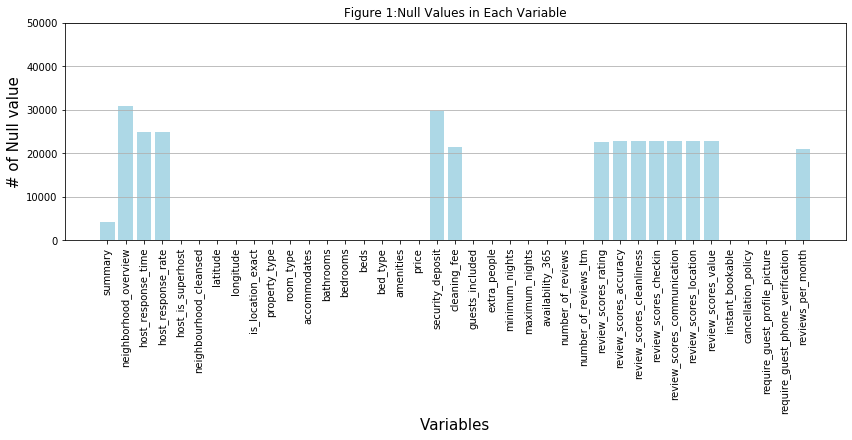

In [330]:
fig, ax = plt.subplots(figsize=(14, 4))
plt.bar(df1.isnull().sum(axis=0).index, df1.isnull().sum(axis=0).values, color = 'lightblue')
plt.xticks(rotation = 90)
plt.xlabel('Variables',size=15)
plt.ylabel('# of Null value',size=15)
plt.title('Figure 1:Null Values in Each Variable')
plt.ylim(0, 50000)
plt.grid(axis='y')
plt.show()

In [4]:
columns_review=['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
    'review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']
df1[columns_review]=df1[columns_review].fillna(0)

In [96]:
#drop columns with all values being nan
df2=df1.dropna()
print(df2.shape)

(26296, 39)


### Step3:Transform some categorical data into float.
There are 5 numeric variables have been recorded as object. I need to transform them.

Now the data cleaning has done. The new data set is being recorded as `df2`

In [46]:
#remove all the $sign and change the variable into float
columns_object=['price','security_deposit','cleaning_fee','extra_people','host_response_rate']
for i in columns_object:
    df2[i]= df2[i].str.replace('$', '')
    df2[i] = df2[i].str.replace(',', '')
    df2[i] = df2[i].str.replace('%', '')
    df2[i] = df2[i].astype(float)

## Data Visualization
### Map Plot of Airbnb Price & Number
To analyze the airbnb difference in boroughs, I plot the price distribution and number distribuion on London map. 
#### Reshape Data
Column _neighbourhood_cleansed_ represent the borough. By using the _groupby()_ function, I get the mean price of the 32 boroughs and the total airbnb houses in the 32 boroughs. Which can be seen as **df_place** below. 
#### Merge Data
The london_map_file contain the latitude and longitude information. Therefore I merge this new file with **df_place** to do the map plot.
#### Map Plot (Figure 2)
The blue heat map show how prices different in these borough. We can see that airbnb near the central london have high price than those far away from central london. 

The Green heat map show the airbnb number in each borough. Same as above, the borough near the central london has more airbnb houses than the other boroughs far away from london.

,price,count
neighbourhood_cleansed,,
Barking and Dagenham,61.653846,78
Barnet,86.914508,386
Bexley,61.782609,46


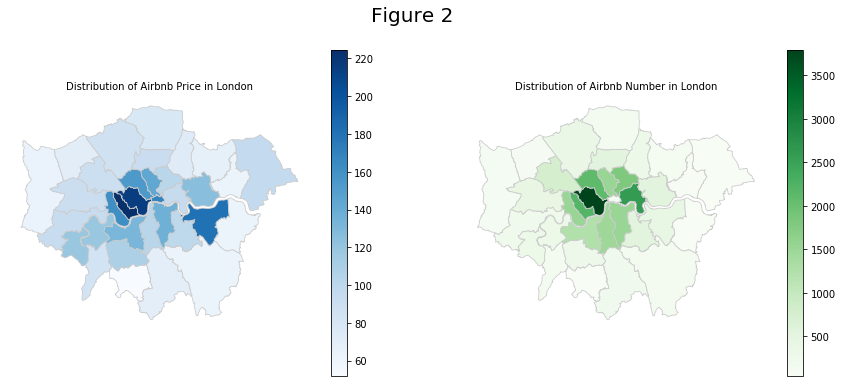

In [349]:
# import the map file
london_map_file = "statistical-gis-boundaries-london/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp"
london_map = gpd.read_file(london_map_file)

# New dataframe 
list_place_price=['price','neighbourhood_cleansed']
df_place_price=df2[list_place_price].groupby(['neighbourhood_cleansed']).mean()
df_place_count=df2[list_place_price].groupby(['neighbourhood_cleansed']).count()
df_place_count.columns = ['count']
df_place=df_place_price.join(df_place_count)

# merge
merge_plot=london_map.set_index('NAME').join(df_place)

# choropleth was set to be (120,220)
vmin, vmax = 120, 220


# draw the maps
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 6))




axes[0].set_title('Distribution of Airbnb Price in London', fontdict={'fontsize': '10', 'fontweight': '1'})

axes[0].axis('off')
merge_plot.plot(column='price', cmap='Blues', linewidth=0.8, ax=axes[0], edgecolor='0.8',legend=True)




axes[1].set_title('Distribution of Airbnb Number in London', fontdict={'fontsize': '10', 'fontweight': '1'})
axes[1].axis('off')
merge_plot.plot(column='count', cmap='Greens', linewidth=0.8, ax=axes[1], edgecolor='0.8',legend=True);
fig.suptitle('Figure 2',fontsize=20);

df_place.head(3)

### Bar Plot: Airbnb Price & Number of Each Borough
These two plot show the accurate bar plot of the average price and total number in each borough. 
From the left plot we can see:  
1. _Kensington and Chelsea_, _Westminster_ are very expensive compared with other borough.
2. _Sutton_,_barking and dagenham_, _bexley_, _bromley_ have very low average price.

From the right plot we can see:
1. _Tower Hamlets_ and _Westminster_ have many aibnb houses.
2.  _bexley_ and _Sutton_ have few airbnb houses.

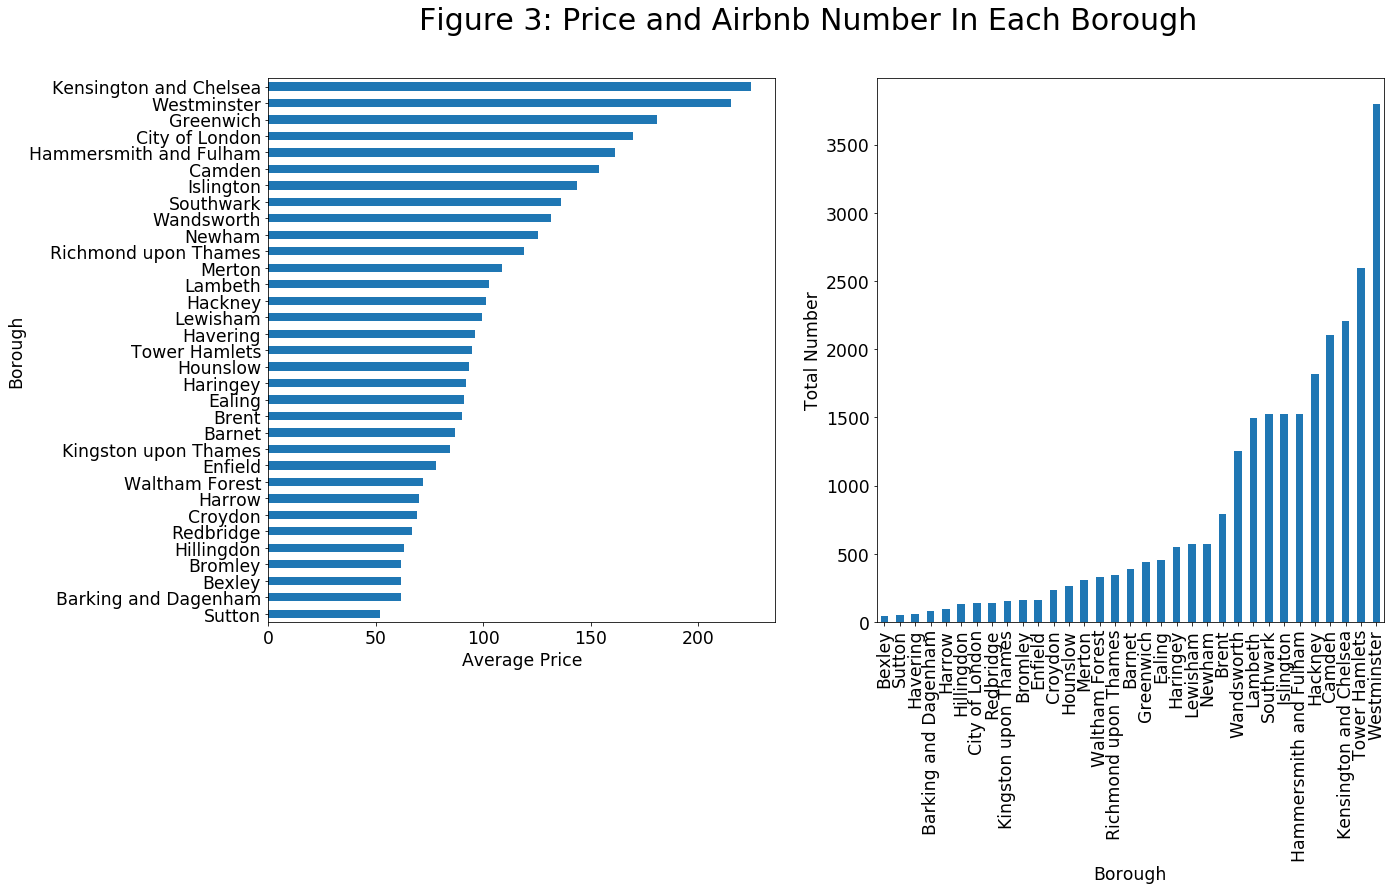

In [348]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))

df_place.sort_values(by=['price'])['price'].plot(kind="barh",ax=axes[0],fontsize='xx-large')
#axes[0].set_xticklabels(list(df_place.sort_values(by=['price']).index),rotation=60, fontsize='small')
axes[0].set_ylabel('Borough',fontsize='xx-large')
axes[0].set_xlabel('Average Price',fontsize='xx-large')
df_place.sort_values(by=['count'])['count'].plot(kind="bar",ax=axes[1],fontsize='xx-large')

axes[1].set_ylabel('Total Number',fontsize='xx-large')
axes[1].set_xlabel('Borough',fontsize='xx-large')
fig.suptitle('Figure 3: Price and Airbnb Number In Each Borough',fontsize=30);


### Bar Plot:Tube Station and Attraction Number of the Boroughs
Continue on boroughs' airbnb price and number. Tube station number and attraction number may affect the borough's price and airbnb number. 

From figure4 we can see that:
1. Westminster has a lot of tube stations and attractions. It also has expensive price and large airbnb number. 
2. Bexley and Sutton which even don't have any tube stations, also have low price and few airbnb houses.

Therefore, Borough contain more tube stations and attractions may have higher price and more airbnb number.

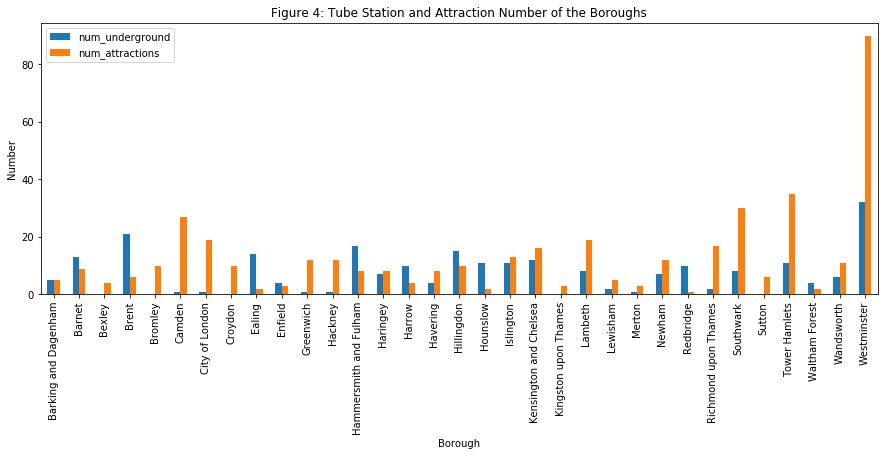

In [352]:
df_source[['num_underground','num_attractions']].plot(kind='bar',figsize=(15,5))
plt.title('Figure 4: Tube Station and Attraction Number of the Boroughs');
plt.ylabel('Number')
plt.xlabel('Borough');

### Violin Plot: Further Analysis on Airbnb Price in Different Borough
To see futher price distribution in different borough, I decide to use the biolin plot. I also extend three differnt plot which are **price**, **cleaning fee**, and **security deposit**. Cleaning fee and security deposit also affect the price. 

To better see the violin plot, I only pick four boroughs: **Camden**,**Kensington and Chelsea**,**Tower Hamlets**,**Westminster**. These boroughs are top four borough when I sorted by airbnb house number. 

From figure 6, we can see that:
1. Airbnb in Tower Hamlets area have more lower prices.
2. The lower prices in Tower Hamlets also have lower cleaning fee and security deposit. 
3. Tower Hamlets don't have too many expensive houses.
4. The deposit fee have very large range in these four boroughs. 

The price has a positive correlation with cleaning fee adn security deposit. If a house has cheap price than it is possible has a cheap cleaning fee and secuirty deposit at the same time.  


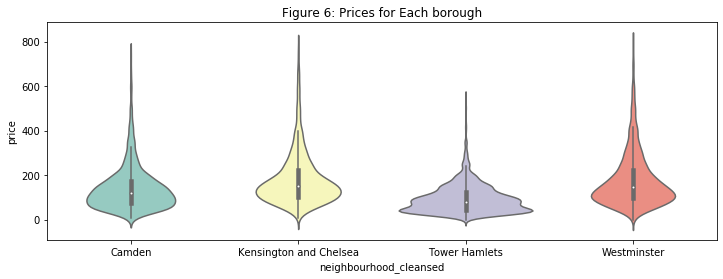

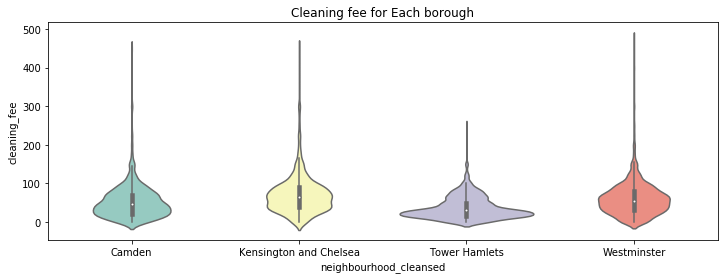

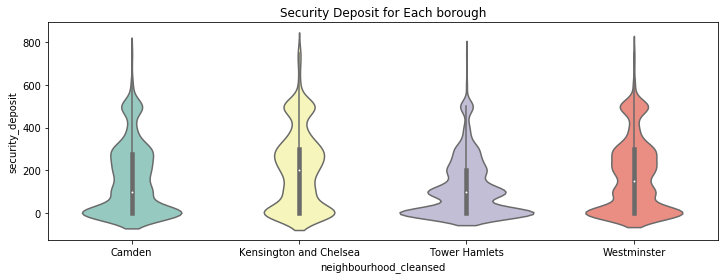

In [353]:
# reshape: select airbnb house only in this four area.
neighbourhood_list=['Camden','Kensington and Chelsea','Tower Hamlets','Westminster']
df_neighbour=pd.DataFrame()
for i in neighbourhood_list:
    df_neighbour=pd.concat([df_neighbour,df2[df2['neighbourhood_cleansed']==i]])

df_neighbour=df_neighbour.reset_index()  

fig, ax = plt.subplots(figsize=(12,4))
sns.violinplot(data=df_neighbour[df_neighbour.price < 800], x='neighbourhood_cleansed', y='price',palette="Set3")
ax.set_title('Figure 6: Prices for Each borough')

fig, ax = plt.subplots(figsize=(12,4))
sns.violinplot(data=df_neighbour[df_neighbour.cleaning_fee < 500], x='neighbourhood_cleansed',
               y='cleaning_fee',palette="Set3")
ax.set_title('Cleaning fee for Each borough');

fig, ax = plt.subplots(figsize=(12,4))
sns.violinplot(data=df_neighbour[df_neighbour.security_deposit < 800], x='neighbourhood_cleansed', 
               y='security_deposit',palette="Set3")
ax.set_title('Security Deposit for Each borough');


### Plot of Room Type:
Different borough also have differnt major room type. I reshapre the data below. 

From figure 7 we can see that:
1. Usually, there are more entire house than single room. Westminster has much more entire house than single room. 
2. In Tower Hamlets, there are half-half entire and not entire hosues.
3. Entire house are usually more expensive than not entire house. 
4. In Kensington and Chelsa, the price of entire house is close to not entire. However, the other three are not.  

,Entire home/apt,Not Entire
neighbourhood_cleansed,,
Camden,1508,597
Kensington and Chelsea,1862,345
Tower Hamlets,1431,1166
Westminster,2997,799


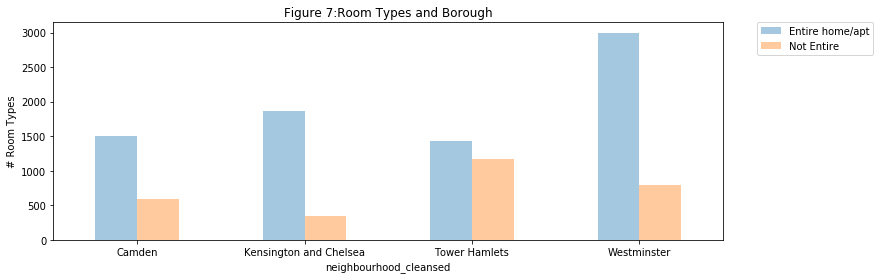

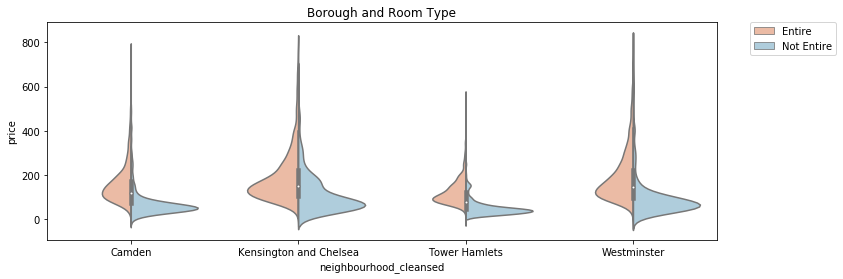

In [360]:
#RESHAPE THE DATA
neighbour_house=df_neighbour[df_neighbour['room_type']=='Entire home/apt']
neighbour_house=neighbour_house.groupby('neighbourhood_cleansed').size()
neighbour_house=neighbour_house.rename("Entire home/apt")


neighbour_room=df_neighbour[df_neighbour['room_type']!='Entire home/apt']
neighbour_room=neighbour_room.groupby('neighbourhood_cleansed').size()
neighbour_room=neighbour_room.rename("Not Entire")

neighbour_by_roomtype = pd.concat([neighbour_house, neighbour_room], axis=1)

ax = neighbour_by_roomtype.plot(kind="bar", edgecolor='none', alpha = 0.4, figsize=(12,4))
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Figure 7:Room Types and Borough')
ax.set_xticklabels(['Camden','Kensington and Chelsea','Tower Hamlets','Westminster'], rotation=0, fontsize='medium');
ax.set_ylabel('# Room Types');

list_room=[]
for i in range(df_neighbour.shape[0]):
    if df_neighbour['room_type'][i]=='Entire home/apt':
        list_room.append('Entire')
    else:
        list_room.append('Not Entire')
        
df_neighbour['Is Entrie']=list_room

fig, ax = plt.subplots(figsize=(12,4))
ax = sns.violinplot(x="neighbourhood_cleansed", y="price", data=df_neighbour[df_neighbour['price']<800], points=100, 
                    hue="Is Entrie", palette="RdBu", split=True)
ax.set_title('Borough and Room Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
neighbour_by_roomtype.head(4)

### Pie plot: Host response time in each area.
There are 4 different category of a host's response time: **A few days**, **An day**,**A few hours**,**An hour**. 
First, I conclude the total count on each reponse time type for the 4 borough.
Then I found that , most hosts can response in an hour. Especially, 75% hosts in Tower Hamlets can response in an hour which is the highest rate amoung these four boroughs. 

index  summary  \
neighbourhood_cleansed host_response_time                   
Camden                 a few days or more     20       20   
                       within a day          180      180   
                       within a few hours    397      397   
                       within an hour       1508     1508   

                                           neighborhood_overview  \
neighbourhood_cleansed host_response_time                          
Camden                 a few days or more                     20   
                       within a day                          180   
                       within a few hours                    397   
                       within an hour                       1508   

                                           host_response_rate  \
neighbourhood_cleansed host_response_time                       
Camden                 a few days or more                  20   
                       within a day                       180   
                       within a few hours                 397   
                       within an hour                    1508   

                                           host_is_superhost  latitude  \
neighbourhood_cleansed host_response_time                                
Camden                 a few days or more                 20        20   
                       within a day                      180       180   
                       within a few hours                397       397   
                       within an hour                   1508      1508   

                                           longitude  is_location_exact  \
neighbourhood_cleansed host_response_time                                 
Camden                 a few days or more         20                 20   
                       within a day              180                180   
                       within a few hours        397                397   
                       within an hour           1508               1508   

                                           property_type  room_type  ...  \
neighbourhood_cleansed host_response_time                            ...   
Camden                 a few days or more             20         20  ...   
                       within a day                  180        180  ...   
                       within a few hours            397        397  ...   
                       within an hour               1508       1508  ...   

                                           review_scores_checkin  \
neighbourhood_cleansed host_response_time                          
Camden                 a few days or more                     20   
                       within a day                          180   
                       within a few hours                    397   
                       within an hour                       1508   

                                           review_scores_communication  \
neighbourhood_cleansed host_response_time                                
Camden                 a few days or more                           20   
                       within a day                                180   
                       within a few hours                          397   
                       within an hour                             1508   

                                           review_scores_location  \
neighbourhood_cleansed host_response_time                           
Camden                 a few days or more                      20   
                       within a day                           180   
                       within a few hours                     397   
                       within an hour                        1508   

                                           review_scores_value  \
neighbourhood_cleansed host_response_time                        
Camden                 a few days or more                   20   
                       within a day                     

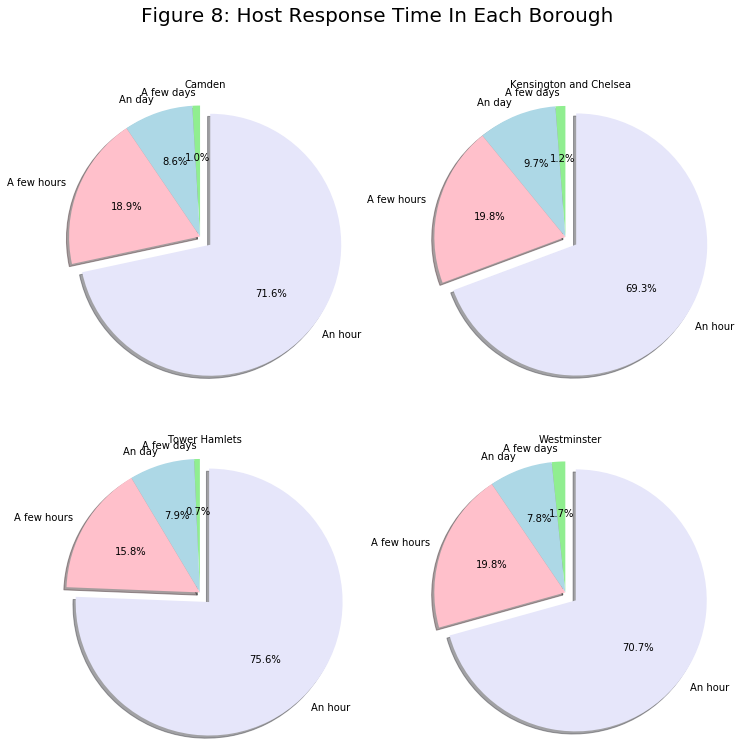

In [369]:
labels=['A few days','An day','A few hours','An hour']
sizes = df_neighbour.groupby(['neighbourhood_cleansed','host_response_time'])['index'].count()['Camden']
explode = (0, 0, 0, 0.1) 
colors=['lightgreen','lightblue','pink','lavender']
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,12))
ax[0,0].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0,0].axis('equal') 
ax[0,0].set_title('Camden',fontsize=10)

sizes = df_neighbour.groupby(['neighbourhood_cleansed','host_response_time'])['index'].count()['Kensington and Chelsea']
ax[0,1].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0,1].axis('equal') 
ax[0,1].set_title('Kensington and Chelsea',fontsize=10)

sizes = df_neighbour.groupby(['neighbourhood_cleansed','host_response_time'])['index'].count()['Tower Hamlets']
ax[1,0].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1,0].axis('equal') 
ax[1,0].set_title('Tower Hamlets',fontsize=10)

sizes = df_neighbour.groupby(['neighbourhood_cleansed','host_response_time'])['index'].count()['Westminster']
ax[1,1].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1,1].axis('equal') 
ax[1,1].set_title('Westminster',fontsize=10)
fig.suptitle('Figure 8: Host Response Time In Each Borough',fontsize=20);
#plt.show();

df_neighbour.groupby(['neighbourhood_cleansed','host_response_time']).count().head(4)

### Bar plot: Compare the review score in different Boroughs
#### Step1: Reshape the Data
Use the `groupby()` function to conclude the review scores in each borough, which is shown in the table below.There are **6** different types of review score. The variable _review_socres_accuracy_ is the average score. And the other **5** scores repesent customer's review on the cleanliness, check in process, communication, location.

#### Step2: Bar plot
The figure showed how these score different between each other. First of all, most of the scores are over 9/10. Secondly, the average cleanliness score is lower than the others. 

We can also conclude that:
1. Tower Hamlets has the highest communication scores. The review scores usually descirbe how well the customers communicate with the hosts. Combine with the pie plot above, we can conclude that the hosts in airbnb do better in communication than the others. 
2. Tower Hamlets has the worst location score. It has less tube stations and that can be the main reason explaining why it has such low score. 
3. Kensington and Chelsea borough gets the highest cleanliness review score. This borough also has the highest average cleanliness fee which can be found in figure 6. 
4. Tower Hamlets has the lowest cleanliness score. It also have very low cleaning fee in figure 6.

,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location
neighbourhood_cleansed,,,,,
Camden,9.440380,9.254157,9.538717,9.572922,9.746318
Kensington and Chelsea,9.400544,9.284549,9.551427,9.568192,9.786135
Tower Hamlets,9.445514,9.199461,9.562187,9.634963,9.426646
Westminster,9.336934,9.209431,9.470232,9.463119,9.717861


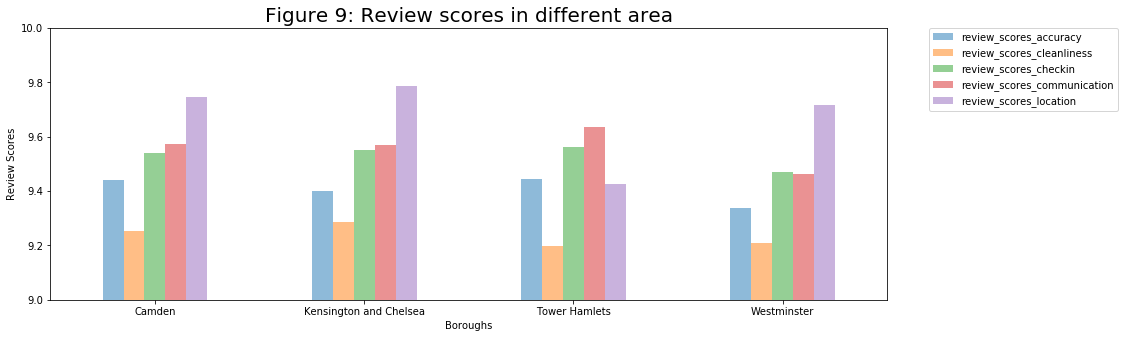

In [365]:
# Reshape the data
df_review=df_neighbour[['review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
              'review_scores_communication', 'review_scores_location',
              'neighbourhood_cleansed']].groupby('neighbourhood_cleansed').mean()

ax=df_review.plot(kind='bar',figsize=(15,5),alpha=0.5,ylim=(9,10))
ax.set_xticklabels(['Camden','Kensington and Chelsea','Tower Hamlets','Westminster'], rotation=0, fontsize='medium')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('Boroughs')
ax.set_ylabel('Review Scores')
ax.set_title('Figure 9: Review scores in different area',fontsize=20);

df_review.head(4)

### Word Cloud 
In this part, I want to compare the text differences between the boroughs. The variable **summary** describe each airbnb in general, including its location, transport, attraction and room type. 

Therefore I build the 4 word cloud to see the airbnbs' characteristics in each area. 

1. The word **flat** appears most frequently in all 4 word cloud.
2. The two borough: Camden and Westminster show ***Central London**
3. The attractions also showed up in each word cloud. 

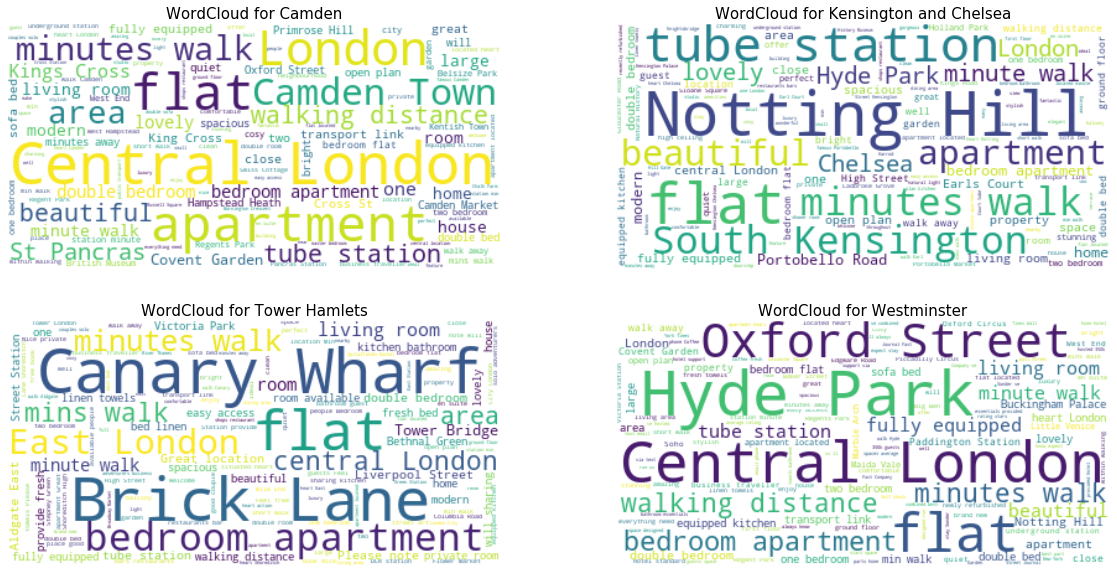

In [47]:
#word cloud
text1=''
for i in df2[df2['neighbourhood_cleansed']=='Camden']['summary']:
    text1+=i
wordcloud1 = WordCloud(background_color="white",max_font_size=50).generate(text1)

text2=''
for i in df2[df2['neighbourhood_cleansed']=='Kensington and Chelsea']['summary']:
    text2+=i
wordcloud2 = WordCloud(background_color="white",max_font_size=50).generate(text2)

text3=''
for i in df2[df2['neighbourhood_cleansed']=='Tower Hamlets']['summary']:
    text3+=i
wordcloud3 = WordCloud(background_color="white",max_font_size=50).generate(text3)

text4=''
for i in df2[df2['neighbourhood_cleansed']=='Westminster']['summary']:
    text4+=i
wordcloud4 = WordCloud(background_color="white",max_font_size=50).generate(text4)


plt.figure(figsize=(20,10))
plt.subplot(221)
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('WordCloud for Camden',fontsize= 15)

plt.subplot(222)
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('WordCloud for Kensington and Chelsea',fontsize= 15)

plt.subplot(223)
plt.imshow(wordcloud3, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('WordCloud for Tower Hamlets',fontsize= 15)

plt.subplot(224)
plt.imshow(wordcloud4, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('WordCloud for Westminster',fontsize= 15)


plt.show()

## Conclusion 
From the above analysis, it can be conclude that airbnb in differnt borough has different characteristic. 

Firstly, airbnb near the central london have high price and number than those far away from central london. Boroughs with many attractions and tube stations also have more airbnb houses and higher price. 

Then in the compare of **4 popular boroughs**, we can also conclude that Kensington chelsa, and Westiminster have higher price and better houses (more entire houses). Tom Hamllet is the cheapest borough but more hosts in this borough have better response time and lead a high communication review score. 